# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [ ]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

In [ ]:
folder_path=chooser.selected_path
print(folder_path)

In [ ]:
# *********** OBSOLETE ***********
# ### Select Folder App - After you run, you can select your folder for filepath
# button = widgets.Button(description = 'Select Folder') #<- creates a button variable
# display(button) #<- displays the button in output

# def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
#     global folder_path #<- sets a variable as a global variable, not just within this action
#     #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
#     folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
#     #Tk().update() #<- below
#     #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
#     print(folder_path) #<- this helps confirm that this action was performed
#     print('done step 2')
# button.on_click(select_folder)

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [ ]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)

print(bins)


print("done step 3")

# 4. Construct filelist from folder path (No input required, just run)

In [ ]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

# 5. Process Data Function (No input required, just run)

In [ ]:
string=filelist[0]
print(string)
print('date')
print(string.split('/')[-3].split('_')[0])
print(string.split('/')[-3].split('_')[1])
# print(string.split('/')[6].split('_')[4].split('.')[0][1:5])
'/Volumes/JOSEPH/BSR/acr-3(ok2049)_OffFood/20230217_101835/RB1659_6x2_n72h20C_420s_C0217_RN1.00201.dat'
'/Volumes/JOSEPH/BSR/N2_OffFood/20220630_133223/N2_6x2_n72h20C_420s_A0630_NN1.00332.dat'

In [ ]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    if Strain_N > 1000:
        strain_filelist = random.sample(strain_filelist,1000)
    Strain_N = len(strain_filelist)
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in tqdm(enumerate(strain_filelist, start=1)): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
        try:
            DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        except Exception:
            pass
        DF_Read['plate_id'] = f.split('/')[-2].split('_')[1]
        DF_Read['date'] = f.split('/')[-2].split('_')[0]
        if i==1:
            DF_Total = DF_Read
            DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#             pathlen_i = np.array(DF_Total.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Total["distance"]=resultS.cumsum()
            DF_Total=DF_Total.dropna()
#             print(DF_Total)
        else:
            DF_Add = DF_Read
            DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             pathlen_i = np.array(DF_Add.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Add["distance"]=resultS.cumsum()
#             DF_Add = DF_Add.dropna()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = True)  #<- imports and cleans data
        print(statement)
#         print(DF_Total)
    DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)
#     print(DF_Total)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
    DF_Total['time_bin'] = DF_Total['time_bin'].astype(np.float64)
    DF_time_bin=DF_Total.groupby(["time_bin", "worm", "plate_id", "date"], as_index=False).mean()
    DF_time_bin = DF_time_bin[(300 <= DF_time_bin["time_bin"])&(400 >= DF_time_bin["time_bin"])]
    
    # DF_time_bin=DF_Total.groupby(["date", "plate_id"], as_index=False).mean()
#     print(DF_time_bin)
    #     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_time_bin, #DF_Total if want to non-binned data
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

# 6.1 Processing Data (Please Read, Input Here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

In the same example, if the identifier for your second strain is 'AVR14', then the N2 files will also be included, as this identifier can also be found in this file path.

## Depending on how many strains you are running for comparison, you may need to add/delete some lines.

You are not naming your data groups here, we have a step for that later.
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [ ]:
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(list(set(filelist)))
# nfiles = list(range(1, len(filelist.unique())+1))
# print(nfiles)
# strainnames = []
strainnames=[]
for f in filelist:
    strainnames.append(f.split('/')[-3])
ustrainnames=list(set(strainnames))
print(ustrainnames)
ustrainnames.sort()
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("cat-2(e1112)_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("cat-2(e1112)_OffFood")))

ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OffFood")))
# print(ustrainnames)
nstrains=list(range(1,len(ustrainnames)+1))
# print(nstrains)

StrainNames = {}
StrainNames = {nstrains[i]: ustrainnames[i] for i in range(len(nstrains))}
print(StrainNames)
print("done step 6.1")

# <---------------- Test element to use for dictionary buidling -------------------
# s = '/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
# slist=s.split('/')[5]
# print(slist)
# print(list(range(1,5+1)))

In [ ]:
# # ------------This Cell Is Now Defunct ----------------


# #Format: Strain_# = 'unique_identifier'

# ### Make into dictionary
# StrainNames = {
#     'Strain_1' : 'No_Parafilm',   #<- each strain will be designated to a unique identifier here
#     'Strain_2' : 'Yes_Parafilm',
# #     'Strain_3' : 'e1112_OffFood',
# #     'Strain_4' : 'e1112_OnFood',
# #     'Strain_5' : 'Test_OffFood',
# #     'Strain_6' : 'Test_OnFood',
# #     'Strain_5' : 'N2_NoFood',
# #     'Strain_6' : 'N2_Food',
# #     'Strain_9' : 'LX636_NoFood',  #<- empty entries are for those hardcore trackers that tracking this many strains
# #     'Strain_10' : 'LX636_Food',
# #     'Strain_11' : '',
# #     'Strain_12' : '',
# #     'Strain_13' : '',
# #     'Strain_14' : '',
# #     'Strain_15' : '',
# }
# #...etc, etc

# print('done step 6.1')
# print(StrainNames)

# Cell below is to run testing/debugging. Do not need to run (commented out)

In [ ]:


# DF_Read = pd.read_csv('/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
#                       , sep=' ', header = None, index_col=False) #<- imports and cleans data
# DF_Read["worm"]=1
# # print(DF_Read)
# DF_Total = DF_Read #<- more data cleaning
# DF_Total = DF_Total.rename( #<- more data cleaning
#             {0:'time',
#             1:'speed',
#             2: "x",
#             3: "y",
#             4: "angularspeed",
#             5: "pathlength",
#             6: "kink",
#             7: "bias",
#             8: "curve",
#             9: "dir",
#             10: "crab",
#             11: "length",
#             12: "midline",
#             13: "width",
#             14: "morphwidth",
#             15: "area"
#             }, axis=1)
# DF_Total["x_0"] = DF_Total.x - DF_Total.x.iloc[0]
# DF_Total["y_0"] = DF_Total.y - DF_Total.y.iloc[0]

# DF_Total["x_test"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
# DF_Total["y_test"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
# DF_Total["distance"]= 0
print(DF_Total)

# A_i = np.array(DF_Total['pathlength'][1:])
# A_i_1 = np.array(DF_Total['pathlength'][0:-1])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# DF_Total["distance"]=new_list
# print(DF_Total)



        


# A_i = np.array(DF_Total.iloc[1:,5])
# A_i_1 = np.array(DF_Total.iloc[0:-1,5])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# print(A_i)
# print(A_i_1)
# print(len(A_i))
# print(len(A_i_1))
# # resultS=pd.Series(result)
# # print(resultS.cumsum())
# # print(new_list)

# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
    
    
# import matplotlib.pyplot as plt
# plt.plot(new_list)

# 6.2 Process Data (just run this cell)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in tqdm(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

# Convert float64 data to float32 to reduce memory load (can also convert to 16 if needed)

For plain english:

float16 = 4 decimal points

float32 = 8 decimal points

float64 = 16 decimal points

more decimal points = more data/memory that computer has to keep track of

In [ ]:
#No need to run here
for n in tqdm(DataLists[1:]):
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float16)
    print("done this strain")

In [ ]:
#No need to run here

# print(TotalConcatenated.dtypes)
TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# print(TotalConcatenated.dtypes)
# TotalConcatenated.dtypes
# Test Cell
# DataLists[1].to_csv("test.csv")
Test = TotalConcatenated.reset_index(drop=True)
print(Test)

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [ ]:
TotalConcatenated=pd.concat(df.assign(Strain=StrainNames.get(i+1)) for i,df in enumerate(DataLists[1:]))
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
print(TotalConcatenated)
print(os.getcwd())
TotalConcatenated.to_csv("/Users/Joseph/Desktop/BSR_baseline_output.csv")
# print("done output")
print('done step 7')

In [ ]:
# day5=TotalConcatenated[TotalConcatenated['Strain'].isin(['Day5_OffFood', 'Day5_OnFood'])]
# day5.to_csv("/Users/Joseph/Desktop/cat2_days/baseline_output.csv")
# print(day5)


In [ ]:
# OffFood=day5[day5['Strain'].isin(['Day5_OffFood'])]
# print(OffFood)
# OnFood=day5[day5['Strain'].isin(['Day5_OnFood'])]
# print(OnFood)
# OffFood.Strain='cat-2(e1112)_OffFood'
# print(OffFood)
# OnFood.Strain='cat-2(e1112)_OnFood'
# print(OnFood)

In [9]:
TotalConcatenated = pd.read_csv("/Users/Joseph/Desktop/BSR_baseline_output.csv")
print(TotalConcatenated)

         Unnamed: 0  time_bin  worm  plate_id      date        time     speed  \
0             49017     300.0     8    135619  20220609  299.536667  0.191487   
1             49018     300.0    11    190420  20240106  299.498600  0.332927   
2             49019     300.0    19    191745  20240128  299.509714  0.083329   
3             49020     300.0    30    164741  20220530  299.483174  0.179283   
4             49021     300.0    35    165335  20230705  299.501688  0.238125   
...             ...       ...   ...       ...       ...         ...       ...   
1311588       33104     400.0   224    124222  20220818  399.513917  0.130042   
1311589       33105     400.0   226    124222  20220818  399.473818  0.036882   
1311590       33106     400.0   227    124222  20220818  399.513917  0.069183   
1311591       33107     400.0   231    124222  20220818  399.513917  0.132342   
1311592       33108     400.0   232    124222  20220818  399.513917  0.135517   

                 x         

In [ ]:
# # <------------------- This cell is now DEFUNCT -----------------------


# #to add a line, add a comma to the last line and press 'enter' to type into a new line


# TotalConcatenated = pd.concat([DataLists[1].assign(Strain = "Wildtype - No Food"),
#                                DataLists[2].assign(Strain = "Wildtype - Food"),
#                                DataLists[3].assign(Strain = "Test - No Food"),
#                                DataLists[4].assign(Strain = "Test - Food"),
#                                DataLists[5].assign(Strain = "cat-2 (e1112) - No Food"),
#                                DataLists[6].assign(Strain = "cat-2 (e1112) - Food"),
# #                                DataLists[5].assign(Strain = "Wildtype - No Food"),
# #                                DataLists[6].assign(Strain = "Wildtype - Food"),
# #                                DataLists[9].assign(Strain = "dop-1 (vs101) - No Food"),
# #                                DataLists[10].assign(Strain = "dop-1 (vs101) - Food")
#                               ])
# # TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
# print(TotalConcatenated)
# TotalConcatenated.to_csv("output.csv")
# # print("done output")
# print('done step 7')

# ..... TO Here

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

In [ ]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = day5,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        # '#FF00FF',
                        # '#8B008B',
                        # 'green',
                        # 'lightgreen',
                        # 'royalblue',
                        # 'lightblue',
                        # '#FFB5C5',
                        # '#CD6889',
                        # 'maroon',
                        # 'firebrick'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
# plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [22]:
TotalConcatenated['Genotype']

0                      N2
1                      N2
2                      N2
3                      N2
4                      N2
                ...      
1311588    vps-35(ok1880)
1311589    vps-35(ok1880)
1311590    vps-35(ok1880)
1311591    vps-35(ok1880)
1311592    vps-35(ok1880)
Name: Genotype, Length: 1311593, dtype: object

In [2]:
TotalConcatenated = pd.read_csv("/Users/Joseph/Desktop/BSR_baseline_output.csv")
print(TotalConcatenated)
TotalConcatenated = TotalConcatenated.astype({'plate_id': int, 'worm':int, 'date':int})
TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', expand=True)
TotalConcatenated['Gene'] = TotalConcatenated['Genotype'].str.split('(', expand=True)[0]
# for i in TotalConcatenated.index:
#     try:
#         TotalConcatenated.loc[i,'Gene'] = TotalConcatenated.loc[i,'Genotype'].str.split('(')[0]
#     except Exception:
#         TotalConcatenated.loc[i,'Gene'] = TotalConcatenated.loc[i,'Genotype']
TotalConcatenated
# TotalConcatenated["date"].unique()

         Unnamed: 0  time_bin  worm  plate_id      date        time     speed  \
0             49017     300.0     8    135619  20220609  299.536667  0.191487   
1             49018     300.0    11    190420  20240106  299.498600  0.332927   
2             49019     300.0    19    191745  20240128  299.509714  0.083329   
3             49020     300.0    30    164741  20220530  299.483174  0.179283   
4             49021     300.0    35    165335  20230705  299.501688  0.238125   
...             ...       ...   ...       ...       ...         ...       ...   
1311588       33104     400.0   224    124222  20220818  399.513917  0.130042   
1311589       33105     400.0   226    124222  20220818  399.473818  0.036882   
1311590       33106     400.0   227    124222  20220818  399.513917  0.069183   
1311591       33107     400.0   231    124222  20220818  399.513917  0.132342   
1311592       33108     400.0   232    124222  20220818  399.513917  0.135517   

                 x         

,Unnamed: 0,time_bin,worm,plate_id,date,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Strain,Genotype,Treatment,Gene
0,49017,300.0,8,135619,20220609,299.536667,0.191487,23.302560,19.149573,13.826667,0.099533,38.053333,1.000000,31.806667,0.000000,0.008833,0.962100,1.089547,0.249120,0.107060,0.111537,N2_OffFood,N2,OffFood,N2
1,49018,300.0,11,190420,20240106,299.498600,0.332927,31.386673,41.865087,62.253333,9.102667,87.713333,-1.000000,46.340000,0.003200,0.076153,0.659160,1.055913,0.410580,0.111867,0.105802,N2_OffFood,N2,OffFood,N2
2,49019,300.0,19,191745,20240128,299.509714,0.083329,23.301114,32.973129,8.700000,13.195000,94.835714,0.642857,44.478571,0.058071,0.030636,0.579536,0.841607,0.270771,0.172593,0.108517,N2_OffFood,N2,OffFood,N2
3,49020,300.0,30,164741,20220530,299.483174,0.179283,14.273930,16.682596,5.921739,20.765870,43.839130,1.000000,29.608696,0.000000,0.017874,0.924222,1.040517,0.211422,0.103852,0.092741,N2_OffFood,N2,OffFood,N2
4,49021,300.0,35,165335,20230705,299.501688,0.238125,37.705044,29.448875,14.256250,16.841313,30.218750,1.000000,34.468750,0.000250,0.024063,0.837169,1.131575,0.241987,0.135981,0.147121,N2_OffFood,N2,OffFood,N2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311588,33104,400.0,224,124222,20220818,399.513917,0.130042,25.717675,27.326917,2.791667,9.633167,31.625000,1.000000,24.083333,0.000000,0.007850,0.799425,0.889825,0.157950,0.104717,0.100541,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35
1311589,33105,400.0,226,124222,20220818,399.473818,0.036882,16.119009,31.653955,2.872727,3.148727,25.418182,1.000000,25.390909,0.000000,0.008655,0.461455,0.628891,0.081491,0.073118,0.058585,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35
1311590,33106,400.0,227,124222,20220818,399.513917,0.069183,12.034433,31.860867,3.891667,7.895083,24.541667,0.500000,23.358333,0.000000,0.007825,0.707850,0.761267,0.124650,0.093025,0.072414,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35
1311591,33107,400.0,231,124222,20220818,399.513917,0.132342,18.179442,40.702808,4.516667,12.446417,20.108333,1.000000,24.750000,0.000000,0.008567,0.800325,0.855242,0.146700,0.095583,0.098415,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35


In [13]:
chunkeddata_mean = TotalConcatenated.groupby(["Strain","Genotype","Treatment","Gene","plate_id"], as_index=False).mean()
print(chunkeddata_mean)
# chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', expand=True)
worm_avg_speed = chunkeddata_mean[['Gene', 'Treatment', 'speed']]
# worm_avg_speed = chunkeddata_mean[['Gene', 'Treatment', 'bias']]
avg_speed = worm_avg_speed.groupby(["Gene", 'Treatment'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
print("-"*40)
print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False).dropna()
speed_diff.insert(loc=0, column='Gene', value=avg_speed['Gene'])
speed_diff=speed_diff.sort_values(by=["speed"])
# speed_diff=speed_diff.sort_values(by=["bias"])
# speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
# print(speed_diff.iloc[1,1])
# speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
# speed_diff=speed_diff.sort_values(by=["Score"])
# print(speed_diff)

                       Strain          Genotype Treatment      Gene  plate_id  \
0    C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10    131103   
1    C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10    131202   
2    C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10    135447   
3    C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10    144920   
4     C29E4.10(ok2752)_OnFood  C29E4.10(ok2752)    OnFood  C29E4.10    121704   
..                        ...               ...       ...       ...       ...   
965    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35    123109   
966    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35    124242   
967     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35    105614   
968     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35    110203   
969     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35    124222   

       Unnamed: 0    time_b

In [14]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/GRC_Data/Gene_Orthology.csv')
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
print(Gene_Orthology)

    Unnamed: 0       Orthology    Gene Human Gene
0            0     KCNS3•kvs-5   kvs-5      KCNS3
1            1     LAMB2•lam-1   lam-1      LAMB2
2            2       GBA•gba-4   gba-4        GBA
3            4    MCCC1•mccc-1  mccc-1      MCCC1
4            5   CAMK2D•unc-43  unc-43     CAMK2D
..         ...             ...     ...        ...
95          96      PAM•pamn-1  pamn-1        PAM
96          97   DNAJC13•rme-8   rme-8    DNAJC13
97          98  ATP13A2•catp-6  catp-6    ATP13A2
98          99       GBA•gba-1   gba-1        GBA
99         100  ATP13A2•catp-7  catp-7    ATP13A2

[100 rows x 4 columns]


In [15]:
speed_diff=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='inner')
speed_diff=speed_diff.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff)

     Worm Gene      bias  Unnamed: 0              Gene Human Gene
0        acr-3 -0.196592          29      CHRNB1•acr-3     CHRNB1
1      F53B2.5 -0.185935           6     KPNA1•F53B2.5      KPNA1
2        bas-1 -0.183743          12         DDC•bas-1        DDC
3        cat-2 -0.178188          82          TH•cat-2         TH
4        set-2 -0.169775          11      SETD1A•set-2     SETD1A
5       unc-57 -0.128838          50     SH3GL2•unc-57     SH3GL2
6        mbk-1 -0.114473          41      DYRK1A•mbk-1     DYRK1A
7        rme-8 -0.113482          97     DNAJC13•rme-8    DNAJC13
8        snb-5 -0.093147          15       VAMP4•snb-5      VAMP4
9           N2 -0.081999          92             WT•N2         WT
10       dop-3 -0.063824          27    DRD2\3\4•dop-3   DRD2\3\4
11      sipa-1 -0.061313          72    SIPA1L2•sipa-1    SIPA1L2
12      let-19 -0.047462          89      MED13•let-19      MED13
13       acr-8 -0.046719          36      CHRNB1•acr-8     CHRNB1
14      ca

In [62]:
df1 = speed_diff[speed_diff.isna().any(axis=1)]
df1

,Worm Gene,speed,Unnamed: 0,Gene,Human Gene


In [ ]:
start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1)
# print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False)
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'])
speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
# print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

In [ ]:
print(speed_diff.iloc[0,1])

In [ ]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

## Making the bar plot

<Figure size 640x480 with 0 Axes>

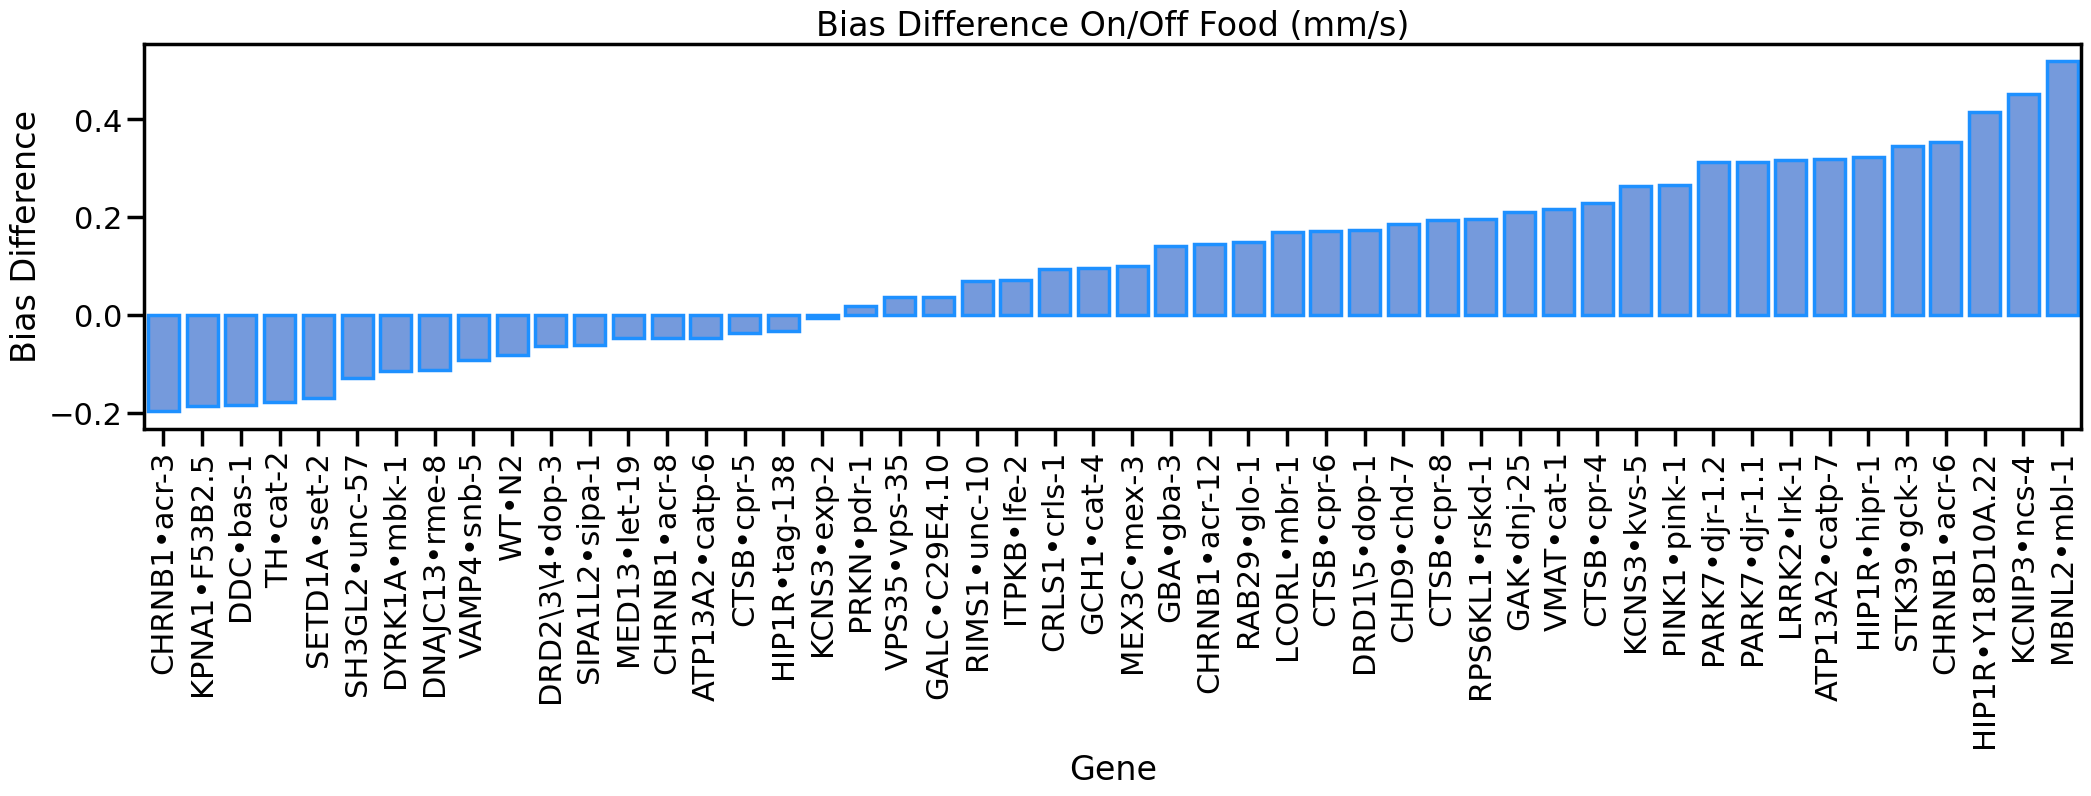

In [16]:
Title = "Basal Slowing (Speed Off Food - Speed On Food), mm/s" #<---------------- Input Here -----------------
FileName = "Bias Difference"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(25, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
             y = 'speed', 
             data = speed_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Gene")
plt.xticks(rotation=90)
plt.ylabel("Basal Slowing")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 200
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
# Test Cell
# chunkeddata_mean

In [ ]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

In [ ]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT = AfterOneHundredMean[AfterOneHundredMean.Genotype != "Test"]
AfterOneHundredTEST = AfterOneHundredMean[AfterOneHundredMean.Genotype != "cat-2 (e1112)"]


In [ ]:
print(AfterOneHundredMean)
print(AfterOneHundredCAT)
print(AfterOneHundredTEST)

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)